In [1]:
%pip install tensorflow
%pip install keras
%pip install opencv-python
%pip install matplotlib




  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.4.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.9.2 requires typing-extensions>=4.6.1; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.23.4 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
albumentations 1.4.18 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.18 requires typing-extensions>=4.9.0; python_version < "3.10", but you have typing-extensions 4.5.0 which is incompatible.
albucore 0.0.17 requires typing-extensions>=4.9.0; python_version < "3.10", but you have typing-extensions 4.5.0 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mr2CumYzyet8O77mLhnz")
project = rf.workspace("strawberry-disease").project("strawberry-disease-detection-dataset")
version = project.version(4)
dataset = version.download("coco")



Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Strawberry-Disease-Detection-Dataset-4 in coco:: 100%|██████████| 4906/4906 [00:04<00:00, 1176.54it/s]


In [ ]:
##  Visualizing Dataset Using ImageDataGenerator

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
# Install the required libraries
%pip install torch torchvision roboflow


  Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
albumentations 1.4.18 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.


In [4]:
import torch
%pip install albumentations
import torchvision
from torchvision import datasets, models
from torchvision.transforms import functional as FT
from torchvision import transforms as T
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split, Dataset
import copy
import math
from PIL import Image
import cv2
import albumentations as A  # our data augmentation library

import matplotlib.pyplot as plt
%matplotlib inline

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\juipi\\ML_project\\venv\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


In [6]:
# remove arnings (optional)
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict, deque
import datetime
import time
from tqdm import tqdm # progress bar
from torchvision.utils import draw_bounding_boxes

In [7]:
print(dataset.location)


c:\Users\Biswajit Paul\Downloads\Strawberry-Disease-Detection-Dataset-4\Strawberry-Disease-Detection-Dataset-4


In [11]:
dataset_path = dataset.location  # The dataset path from Roboflow download
images_dir = os.path.join(dataset_path, 'train')  # Adjust if needed based on your dataset folder structure



In [12]:
images_dir

'c:\\Users\\Biswajit Paul\\Downloads\\Strawberry-Disease-Detection-Dataset-4\\Strawberry-Disease-Detection-Dataset-4\\train'

In [13]:
images_dir = os.path.join(dataset.location, 'train', 'class_name')  # Replace 'class_name' with actual class folder name


In [14]:
print(len(images_dir))

127


In [24]:
import os
import cv2
import matplotlib.pyplot as plt

# Set the path to the training images
images_dir = 'c:\\Users\\Biswajit Paul\\Downloads\\Strawberry-Disease-Detection-Dataset-4\\Strawberry-Disease-Detection-Dataset-4'  # Adjust the path as necessary

# List the image files
image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Display the first 5 images (or as many as available)
for i in range(min(5, len(image_files))):  # Use min to avoid out-of-range errors
    img = cv2.imread(image_files[i])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()


In [25]:
images_dir

'c:\\Users\\Biswajit Paul\\Downloads\\Strawberry-Disease-Detection-Dataset-4\\Strawberry-Disease-Detection-Dataset-4'

In [26]:
import os

# Set the path to the labels directory
labels_dir = '/content/Strawberry-Disease-Detection-Dataset-4/train/labels'  # Update to the correct path

# Preview the first 5 label files
label_files = os.listdir(labels_dir)

# Print contents of the first few label files
for i in range(min(5, len(label_files))):
    label_file_path = os.path.join(labels_dir, label_files[i])

    # Read the label file
    with open(label_file_path, 'r') as file:
        label_data = file.read()

    print(f"Labels for {label_files[i]}:\n{label_data}\n")


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/Strawberry-Disease-Detection-Dataset-4/train/labels'

In [27]:
import os

labels_dir = '/content/Strawberry-Disease-Detection-Dataset-4/train/labels'
label_files = os.listdir(labels_dir)

print("Label files:", label_files[:5])  # Display the first 5 label files to verify


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/Strawberry-Disease-Detection-Dataset-4/train/labels'

In [32]:
import os

# Set the path to your dataset directory
train_dir ='C:\\Users\\Biswajit Paul\\Downloads\\Strawberry-Disease-Detection-Dataset-4\\train'
test_dir = 'C:\\Users\\Biswajit Paul\\Downloads\\Strawberry-Disease-Detection-Dataset-4\\test'

# Get the list of classes from the train directory
classes = os.listdir(train_dir)

# Count the number of classes (labels)
num_classes = len(classes)

print(f"Number of classes in the training dataset: {num_classes}")
print(f"Classes: {classes}")


Number of classes in the training dataset: 3427
Classes: ['angular_leafspot1.rf.b2b20eacfb2678a6e1a0e0dde327c08b.jpg', 'angular_leafspot100.rf.2402638072cef5e93a219a4fb4ee7ead.jpg', 'angular_leafspot100_jpg.rf.e11a401f5a51039509d715fcf728f33b.jpg', 'angular_leafspot101_jpg.rf.4fffdd4d1395aefc62980355c6e8ffaf.jpg', 'angular_leafspot102_jpg.rf.6e0623007302febaec3c82dd56533dad.jpg', 'angular_leafspot103.rf.5ecdb97841dd23a22f757ec7638b5bb9.jpg', 'angular_leafspot104.rf.128e9ff6884291fce5c9e7d9ab7347c2.jpg', 'angular_leafspot105.rf.0ed14c8f7b5b7581768d0e9bf1d83c93.jpg', 'angular_leafspot105_jpg.rf.a6647862d8d0259238e3ead8d884764f.jpg', 'angular_leafspot10_jpg.rf.172c4834d455084663f34b6ba1ea2e05.jpg', 'angular_leafspot11.rf.bd6ee3f2a4d4937dcdc8d8853a61f528.jpg', 'angular_leafspot111.rf.49ff54bfc303a28b234bc38ed448d229.jpg', 'angular_leafspot111_jpg.rf.ce6f918dfca0cda183fb989e175d9f3f.jpg', 'angular_leafspot112.rf.6f9d529687730544937b4da062798361.jpg', 'angular_leafspot112_jpg.rf.339aca896076

In [34]:
import os
import glob

# Define the path to the labels directory
labels_dir = 'C:\\Users\\Biswajit Paul\\Downloads\\Strawberry-Disease-Detection-Dataset-4\\valid'

# Collect all label files
label_files = glob.glob(os.path.join(labels_dir, "*.txt"))

# Create a set to store unique class labels
labels_set = set()

# Loop through each label file and extract class IDs
for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f.readlines():
            label_id = line.split()[0]  # Assuming the first value is the class label ID
            labels_set.add(label_id)

# Show the unique labels found
labels_set


set()

In [ ]:
import os
import glob

# Define the path to the images directory
images_dir = '/content/Strawberry-Disease-Detection-Dataset-4/train/images'

# Collect all image files (assuming common image formats like .jpg, .png, etc.)
image_files = glob.glob(os.path.join(images_dir, "*"))

# Create a set to store unique image names
image_names = set()

# Loop through each image file and extract image names
for image_file in image_files:
    image_name = os.path.basename(image_file)  # Get the base name (image file name)
    image_names.add(image_name)

# Show the unique image names
for image_name in image_names:
    print(image_name)

# Show the number of unique images
print(f"Total number of unique images: {len(image_names)}")


angular_leafspot6_jpg.rf.9248476583033f93a153b02de78c41c3.jpg
gray_mold491.rf.4d55d91f4b6e7d2c48d9fffe878c3a11.jpg
angular_leafspot433.rf.ac8a398df7296d6d7b2be2e2fe2136cf.jpg
gray_mold397.rf.2652580590f6d7a3f38607f4093fbe8d.jpg
gray_mold177_jpg.rf.04b25904b58fe22f3b32363e7bcd3e66.jpg
angular_leafspot18.rf.2b9a8e12ad7c160ebc26ffcd0b6e36f0.jpg
leaf_spot233_jpg.rf.d9bd699d1a95d6d330f44313db309244.jpg
anthracnose_fruit_rot44_jpg.rf.13b1a3f1428a7834e901d27cd29ad328.jpg
angular_leafspot31.rf.471adaa694a490d020c7d83a59f4671e.jpg
leaf_spot135.rf.28c5cfa32c3785305e6e9b6d7fec6fe7.jpg
powdery_mildew_leaf445.rf.89b4ac6e9caa78ca14f6b8b8bce23592.jpg
gray_mold49_jpg.rf.d22d32ec130b3fe076f1f5901ee9f805.jpg
angular_leafspot483.rf.16ee58ba54aed5f26cb96d2461efb3d8.jpg
angular_leafspot243.rf.a7c89924be417062205604a901fbd49b.jpg
powdery_mildew_leaf95_jpg.rf.c353c8c4463da0deb71f277af4788974.jpg
angular_leafspot115.rf.92e47221a26b7b5fe05942d5a7f9eeb1.jpg
gray_mold87.rf.b1e8c5ce388bb429c47ec3015ec787c1.jpg
gr

In [ ]:
import os

# Path to your training dataset directory
train_dir = '/content/Strawberry-Disease-Detection-Dataset-4/train/images'

# Count the number of image files in the directory
image_count = len([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])

print(f"Number of images in the training dataset: {image_count}")


Number of images in the training dataset: 3426


In [ ]:
import os

# Path to the training dataset
train_dir = '/content/Strawberry-Disease-Detection-Dataset-4/train/labels'

# List of subdirectories (each representing a class)
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

print(f"Number of classes in the training dataset: {len(classes)}")
print(f"Classes: {classes}")


Number of classes in the training dataset: 0
Classes: []


In [36]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory containing training images
train_images_dir = "C:\Users\Biswajit Paul\Downloads\Strawberry-Disease-Detection-Dataset-4\Strawberry-Disease-Detection-Dataset-4\train\_annotations.coco.json"

# List all image files in the directory
image_files = os.listdir(train_images_dir)

# Check if there are any images in the directory
if image_files:
    # Select the first image to display
    img_path = os.path.join(train_images_dir, image_files[0])

    # Load the image using OpenCV
    img = cv2.imread(img_path)

    if img is not None:
        # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image using Matplotlib
        plt.imshow(img_rgb)
        plt.title(f"Image: {image_files[0]}")
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print(f"Error loading image: {img_path}")
else:
    print("No images found in the training directory.")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1529962935.py, line 6)

In [ ]:
##################################3

In [106]:
image_dir = "Strawberry-Disease-Detection-Dataset-4/train"
annotation_file = "Biswajit Paul\Downloads\Strawberry-Disease-Detection-Dataset-4\Strawberry-Disease-Detection-Dataset-4\train\_annotations.coco.json"



In [111]:
!pip install pycocotools
from pycocotools.coco import COCO

In [114]:
print("Dataset path:", dataset_path)
print("Train directory exists:", os.path.isdir(os.path.join(dataset_path, "train")))
print("Annotation file path:", annotation_file)
print("File exists:", os.path.isfile(annotation_file))


Dataset path: C:/Users/juipi/ML_project/STRAWBERRY-DISEASE-DETECTION-DATASET
Train directory exists: False
Annotation file path: C:/Users/juipi/ML_project/STRAWBERRY-DISEASE-DETECTION-DATASET\train\_annotations.coco.json
File exists: False


In [38]:
# Now, we will define our transforms
from albumentations.pytorch import ToTensorV2

In [52]:
def get_transforms(train=False):
    if train:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            A.HorizontalFlip(p=0.3),
            A.VerticalFlip(p=0.3),
            A.RandomBrightnessContrast(p=0.1),
            A.ColorJitter(p=0.1),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    else:
        transform = A.Compose([
            A.Resize(600, 600), # our input size can be 600px
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    return transform

In [103]:
dataset_path ="juipi\ML_project\venv\lib\site-packages\pycocotools\coco.py"


In [109]:
class AquariumDetection(datasets.VisionDataset):
    def __init__(self, root, split='train', transform=None, target_transform=None, transforms=None):
        # the 3 transform parameters are reuqired for datasets.VisionDataset
        super().__init__(root, transforms, transform, target_transform)
        self.split = split #train, valid, test
        self.coco = COCO(os.path.join(root, split, "_annotations.coco.json")) # annotatiosn stored here
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.ids = [id for id in self.ids if (len(self._load_target(id)) > 0)]

    def _load_image(self, id: int):
        path = self.coco.loadImgs(id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))

    def __getitem__(self, index):
        id = self.ids[index]
        image = self._load_image(id)
        target = self._load_target(id)
        target = copy.deepcopy(self._load_target(id))

        boxes = [t['bbox'] + [t['category_id']] for t in target] # required annotation format for albumentations
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=boxes)

        image = transformed['image']
        boxes = transformed['bboxes']

        new_boxes = [] # convert from xywh to xyxy
        for box in boxes:
            xmin = box[0]
            xmax = xmin + box[2]
            ymin = box[1]
            ymax = ymin + box[3]
            new_boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.tensor(new_boxes, dtype=torch.float32)

        targ = {} # here is our transformed target
        targ['boxes'] = boxes
        targ['labels'] = torch.tensor([t['category_id'] for t in target], dtype=torch.int64)
        targ['image_id'] = torch.tensor([t['image_id'] for t in target])
        targ['area'] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0]) # we have a different area
        targ['iscrowd'] = torch.tensor([t['iscrowd'] for t in target], dtype=torch.int64)
        return image.div(255), targ # scale images
    def __len__(self):
        return len(self.ids)

In [110]:
#load classes
coco = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json"))
categories = coco.cats
n_classes = len(categories.keys())
categories

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'juipi\\ML_project\x0benv\\lib\\site-packages\\pycocotools\\coco.py\\train\\_annotations.coco.json'

In [91]:
print("Resolved annotation file path:", annotation_file)


Resolved annotation file path: Biswajit Paul\Downloads\Strawberry-Disease-Detection-Dataset-4\Strawberry-Disease-Detection-Dataset-4\train\_annotations.coco.json


In [96]:
classes = [i[1]['name'] for i in categories.items()]
classes

NameError: name 'categories' is not defined

In [17]:
train_dataset = AquariumDetection(root=dataset_path, transforms=get_transforms(True))

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


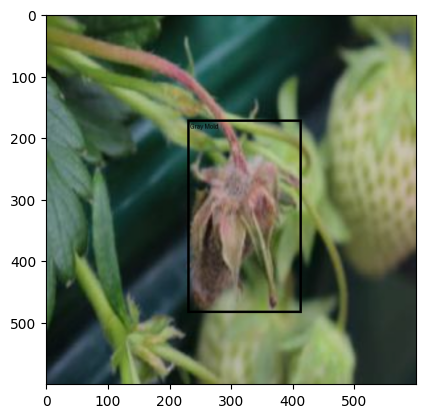

In [19]:
# Lets view a sample
sample = train_dataset[2]
img_int = torch.tensor(sample[0] * 224, dtype=torch.uint8)
plt.imshow(draw_bounding_boxes(
    img_int, sample[1]['boxes'], [classes[i] for i in sample[1]['labels']], width=4
).permute(1, 2, 0))

In [20]:
len(train_dataset)

3426

In [23]:
# lets load the faster rcnn model
model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features # we need to change the head
model.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, n_classes)

In [24]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [25]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=collate_fn)

In [26]:
images,targets = next(iter(train_loader))
images = list(image for image in images)
targets = [{k:v for k, v in t.items()} for t in targets]
output = model(images, targets) # just make sure this runs without error

In [27]:
device = torch.device("cuda") # use GPU to train

In [28]:
model = model.to(device)

In [29]:
# Now, and optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)
# lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[16, 22], gamma=0.1) # lr scheduler

In [30]:
import sys

In [31]:
### Training

In [33]:
def train_one_epoch(model, optimizer, loader, device, epoch):
    model.to(device)
    model.train()

#     lr_scheduler = None
#     if epoch == 0:
#         warmup_factor = 1.0 / 1000 # do lr warmup
#         warmup_iters = min(1000, len(loader) - 1)

#         lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor = warmup_factor, total_iters=warmup_iters)

    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(loader):
        images = list(image.to(device) for image in images)
        targets = [{k: torch.tensor(v).to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets) # the model computes the loss automatically if we pass in targets
        losses = sum(loss for loss in loss_dict.values())
        loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
        loss_value = losses.item()

        all_losses.append(loss_value)
        all_losses_dict.append(loss_dict_append)

        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping trainig") # train if loss becomes infinity
            print(loss_dict)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

#         if lr_scheduler is not None:
#             lr_scheduler.step() #

    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, lr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}, loss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))

In [37]:
import pandas as pd
import numpy as np


In [38]:
num_epochs=10

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_loader, device, epoch)
#     lr_scheduler.step()

100%|██████████| 857/857 [02:14<00:00,  6.39it/s]


Epoch 0, lr: 0.010000, loss: 0.572052, loss_classifier: 0.249365, loss_box: 0.280577, loss_rpn_box: 0.019922, loss_object: 0.022187


100%|██████████| 857/857 [02:11<00:00,  6.54it/s]


Epoch 1, lr: 0.010000, loss: 0.568606, loss_classifier: 0.246823, loss_box: 0.284485, loss_rpn_box: 0.018831, loss_object: 0.018466


100%|██████████| 857/857 [02:09<00:00,  6.61it/s]


Epoch 2, lr: 0.010000, loss: 0.562780, loss_classifier: 0.238822, loss_box: 0.288027, loss_rpn_box: 0.018549, loss_object: 0.017382


100%|██████████| 857/857 [02:09<00:00,  6.62it/s]


Epoch 3, lr: 0.010000, loss: 0.565837, loss_classifier: 0.244923, loss_box: 0.286180, loss_rpn_box: 0.017846, loss_object: 0.016888


100%|██████████| 857/857 [02:08<00:00,  6.65it/s]


Epoch 4, lr: 0.010000, loss: 0.555776, loss_classifier: 0.234696, loss_box: 0.289128, loss_rpn_box: 0.016979, loss_object: 0.014972


100%|██████████| 857/857 [02:05<00:00,  6.81it/s]


Epoch 5, lr: 0.010000, loss: 0.548463, loss_classifier: 0.229521, loss_box: 0.288536, loss_rpn_box: 0.016344, loss_object: 0.014063


100%|██████████| 857/857 [02:05<00:00,  6.81it/s]


Epoch 6, lr: 0.010000, loss: 0.530966, loss_classifier: 0.219944, loss_box: 0.280357, loss_rpn_box: 0.016343, loss_object: 0.014322


100%|██████████| 857/857 [02:04<00:00,  6.89it/s]


Epoch 7, lr: 0.010000, loss: 0.525577, loss_classifier: 0.213380, loss_box: 0.284246, loss_rpn_box: 0.015600, loss_object: 0.012351


100%|██████████| 857/857 [02:05<00:00,  6.84it/s]


Epoch 8, lr: 0.010000, loss: 0.537194, loss_classifier: 0.214409, loss_box: 0.296593, loss_rpn_box: 0.014967, loss_object: 0.011224


100%|██████████| 857/857 [02:04<00:00,  6.90it/s]

Epoch 9, lr: 0.010000, loss: 0.541293, loss_classifier: 0.227947, loss_box: 0.285110, loss_rpn_box: 0.016206, loss_object: 0.012030


In [39]:
# we will watch first epoich to ensure no errrors
# while it is training, lets write code to see the models predictions. lets try again
model.eval()
torch.cuda.empty_cache()

In [43]:
test_dataset = AquariumDetection(root=dataset_path, split="test", transforms=get_transforms(False))

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


In [44]:
img, _ = test_dataset[5]
img_int = torch.tensor(img*255, dtype=torch.uint8)
with torch.no_grad():
    prediction = model([img.to(device)])
    pred = prediction[0]

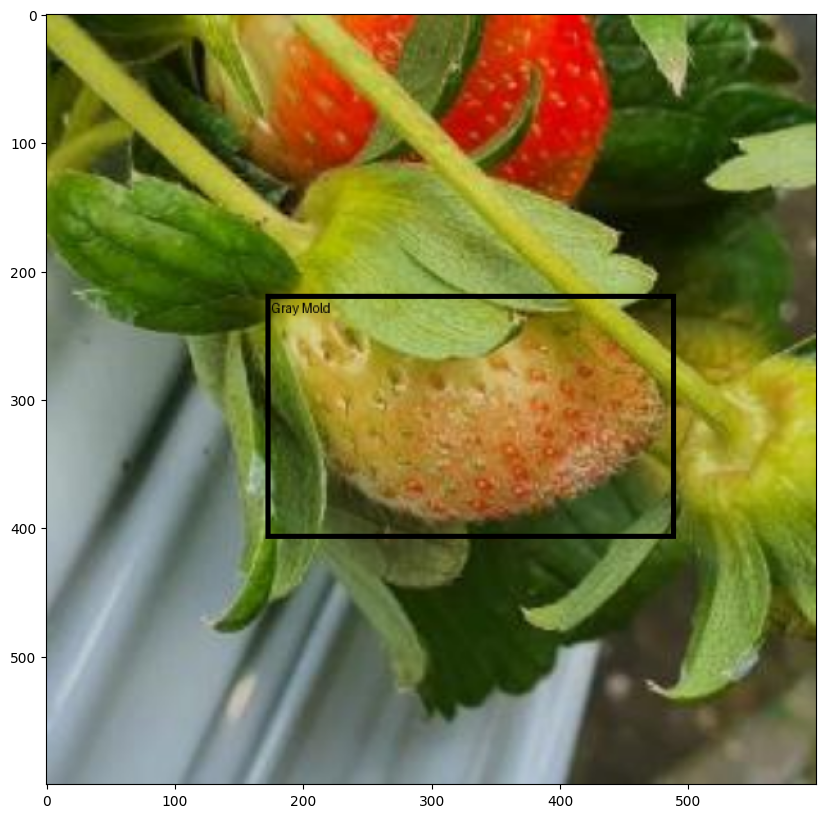

In [49]:
fig = plt.figure(figsize=(12,10))
plt.imshow(draw_bounding_boxes(img_int,
    pred['boxes'][pred['scores'] > 0.8],
    [classes[i] for i in pred['labels'][pred['scores'] > 0.8].tolist()], width=4
).permute(1, 2, 0))